# RNN Model for Stock Price Prediction

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mastercard_stock_history.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3872 non-null   object 
 1   Open          3872 non-null   float64
 2   High          3872 non-null   float64
 3   Low           3872 non-null   float64
 4   Close         3872 non-null   float64
 5   Volume        3872 non-null   int64  
 6   Dividends     3872 non-null   float64
 7   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 242.1+ KB


In [20]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3872 non-null   datetime64[ns]
 1   Open          3872 non-null   float64       
 2   High          3872 non-null   float64       
 3   Low           3872 non-null   float64       
 4   Close         3872 non-null   float64       
 5   Volume        3872 non-null   int64         
 6   Dividends     3872 non-null   float64       
 7   Stock Splits  3872 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 242.1 KB


In [21]:
df.set_index('Date',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2006-05-25 to 2021-10-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3872 non-null   float64
 1   High          3872 non-null   float64
 2   Low           3872 non-null   float64
 3   Close         3872 non-null   float64
 4   Volume        3872 non-null   int64  
 5   Dividends     3872 non-null   float64
 6   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 242.0 KB


In [22]:
df.drop(['Dividends','Stock Splits'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2006-05-25 to 2021-10-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3872 non-null   float64
 1   High    3872 non-null   float64
 2   Low     3872 non-null   float64
 3   Close   3872 non-null   float64
 4   Volume  3872 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 181.5 KB


In [30]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000


In [23]:
dataset = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Mastercard_stock_history.csv", index_col="Date", parse_dates=["Date"]
).drop(["Dividends", "Stock Splits"], axis=1)
print(dataset.head())

                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000


In [3]:
## Describing the dataset
print(dataset.describe())

              Open         High          Low        Close        Volume
count  3872.000000  3872.000000  3872.000000  3872.000000  3.872000e+03
mean    104.896814   105.956054   103.769349   104.882714  1.232250e+07
std     106.245511   107.303589   105.050064   106.168693  1.759665e+07
min       3.748967     4.102467     3.739664     4.083861  6.411000e+05
25%      22.347203    22.637997    22.034458    22.300391  3.529475e+06
50%      70.810079    71.375896    70.224002    70.856083  5.891750e+06
75%     147.688448   148.645373   146.822013   147.688438  1.319775e+07
max     392.653890   400.521479   389.747812   394.685730  3.953430e+08


In [24]:
## Checking if there is any null values
dataset.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Function to create train and test dataset from the given time series data.

In [26]:
dataset.index.min(), dataset.index.max()

(Timestamp('2006-05-25 00:00:00'), Timestamp('2021-10-11 00:00:00'))

In [28]:
## Train and Test Plot function
tstart = 2016
tend = 2020

print(f'{tstart}')

2016


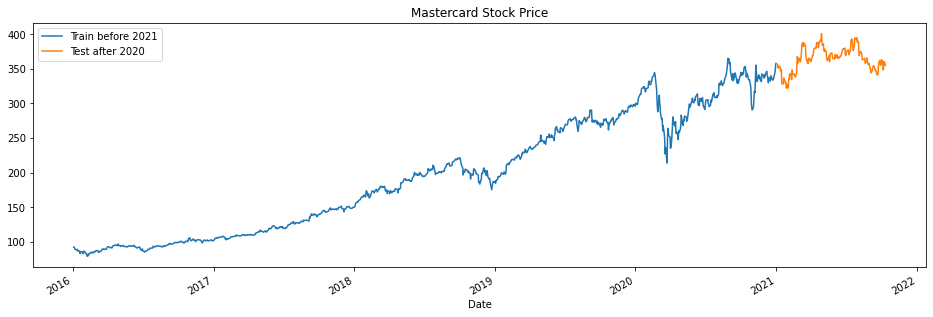

In [33]:
plt.figure(figsize=(16,5))
df.loc["2016":"2020", 'High'].plot(legend=True)
df.loc["2021":, 'High'].plot(legend=True)
plt.legend(['Train before 2021', 'Test after 2020'])
plt.title('Mastercard Stock Price')
plt.show()

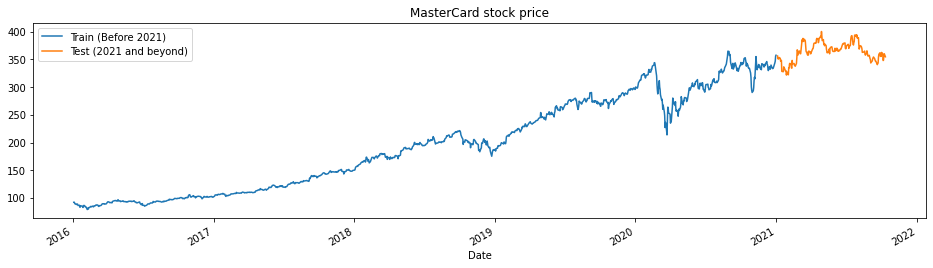

In [27]:


def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)

Function to split train and test data

In [34]:
## Train and Test data split function
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test

training_set, test_set = train_test_split(dataset, tstart, tend)

Scaling the data using MinMaxScaler

In [35]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

### Creating the input data from the given time series data

In [37]:
training_set[1:61], training_set[61]

(array([[92.37765141],
        [91.1718942 ],
        [89.22077038],
        [89.09518007],
        [87.99405878],
        [88.73780394],
        [89.00826694],
        [88.56394672],
        [86.23612085],
        [86.68044406],
        [83.02930409],
        [84.5457772 ],
        [85.80145987],
        [85.18327616],
        [84.51679712],
        [84.08215367],
        [82.72987684],
        [86.2071371 ],
        [86.15883501],
        [84.74862389],
        [83.80202531],
        [83.90827081],
        [83.37706382],
        [78.95317918],
        [80.39238272],
        [81.94750901],
        [79.96737867],
        [82.36283033],
        [83.63783145],
        [84.61341256],
        [84.46849124],
        [83.89861442],
        [85.22192237],
        [84.85486824],
        [83.80200654],
        [84.44919055],
        [85.56963277],
        [85.80145025],
        [87.05713611],
        [87.0184804 ],
        [87.06677621],
        [87.47246527],
        [86.69009681],
        [84

In [41]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [42]:
X_train.shape

(1199, 60, 1)

Viewing the train data 

In [ ]:
## Printing the first record after sequencing
print(X_train[0])

## Number of input values in the each record
print("\n\nNumber of values in each record (features) :", len(X_train[0]))

[[0.04611702]
 [0.04692574]
 [0.04271097]
 [0.03589075]
 [0.03545174]
 [0.03160273]
 [0.03420252]
 [0.03514793]
 [0.0335948 ]
 [0.02545779]
 [0.02701094]
 [0.01424825]
 [0.01954913]
 [0.02393842]
 [0.02177754]
 [0.01944783]
 [0.01792852]
 [0.01320159]
 [0.02535648]
 [0.02518764]
 [0.02025819]
 [0.01694932]
 [0.01732071]
 [0.01546385]
 [0.        ]
 [0.00503079]
 [0.01046679]
 [0.00354517]
 [0.01191856]
 [0.01637538]
 [0.01978556]
 [0.01927898]
 [0.01728695]
 [0.02191263]
 [0.02062957]
 [0.01694926]
 [0.01921151]
 [0.02312806]
 [0.02393839]
 [0.02832768]
 [0.02819256]
 [0.02836138]
 [0.02977948]
 [0.02704468]
 [0.02032563]
 [0.0197855 ]
 [0.02181132]
 [0.02505262]
 [0.02495131]
 [0.02687582]
 [0.02896922]
 [0.03349357]
 [0.03612709]
 [0.0367686 ]
 [0.0353505 ]
 [0.0368362 ]
 [0.03454011]
 [0.03565442]
 [0.03815291]
 [0.04196816]]


Number of values in each record (features) : 60


In [40]:
X_train.shape

(1199, 60, 1)

In [43]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

In [ ]:
X_train.shape

(1199, 60, 1)

In [ ]:
X_train[0]

array([[0.04611702],
       [0.04692574],
       [0.04271097],
       [0.03589075],
       [0.03545174],
       [0.03160273],
       [0.03420252],
       [0.03514793],
       [0.0335948 ],
       [0.02545779],
       [0.02701094],
       [0.01424825],
       [0.01954913],
       [0.02393842],
       [0.02177754],
       [0.01944783],
       [0.01792852],
       [0.01320159],
       [0.02535648],
       [0.02518764],
       [0.02025819],
       [0.01694932],
       [0.01732071],
       [0.01546385],
       [0.        ],
       [0.00503079],
       [0.01046679],
       [0.00354517],
       [0.01191856],
       [0.01637538],
       [0.01978556],
       [0.01927898],
       [0.01728695],
       [0.02191263],
       [0.02062957],
       [0.01694926],
       [0.01921151],
       [0.02312806],
       [0.02393839],
       [0.02832768],
       [0.02819256],
       [0.02836138],
       [0.02977948],
       [0.02704468],
       [0.02032563],
       [0.0197855 ],
       [0.02181132],
       [0.025

In [ ]:
# The LSTM architecture
model_lstm = Sequential()

## RNN Layer
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))

## Output Layer
model_lstm.add(Dense(units=1))

# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

In [ ]:
## Fitting the model
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 7s 8ms/step - loss: 0.0142
Epoch 2/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 3/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 9.8808e-04
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 9.5310e-04
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 8.7565e-04
Epoch 12/50
38/38 [==============================] - 0s 5ms/step - loss: 8.3132e-04
Epoch 13/50
38/38 [==============

### Predicting the values on Test Dataset

In [ ]:
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
print(type(input))


<class 'method'>


In [ ]:
inputs[:5]

array([342.56874365, 345.9927892 , 351.63512734, 353.2671063 ,
       349.78420007])

In [ ]:
inputs = inputs.reshape(-1, 1)

#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)

# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)

#prediction
predicted_stock_price = model_lstm.predict(X_test)

#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

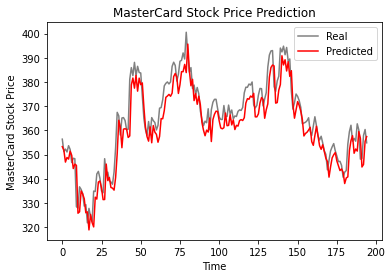

In [ ]:
plot_predictions(test_set,predicted_stock_price)

In [ ]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 6.53.


## GRU Model

In [ ]:
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 125)               48000     
                                                                 
 dense_1 (Dense)             (None, 1)                 126       
                                                                 
Total params: 48,126
Trainable params: 48,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 2s 7ms/step - loss: 0.0192
Epoch 2/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 9.1869e-04
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 9.9658e-04
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 6.7015e-04
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 7.6807e-04
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 6.7032e-04
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 7.1882e-04
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 5.9916e-04
Epoch 12/50
38/38 [==============================] - 0s 6ms/step - loss: 5.4594e-04
Epoch 13/50
38/38

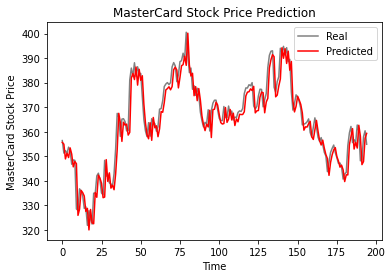

In [ ]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
plot_predictions(test_set, GRU_predicted_stock_price)

In [ ]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 5.43.
